# Legends (ggplot2)
Credits: http://www.cookbook-r.com/ (Creative Commons Attribution-Share Alike 3.0 Unported License)

## Problem
You want to modify the legend of a graph made with ggplot2.

## Solution
Start with an example graph with the default options:

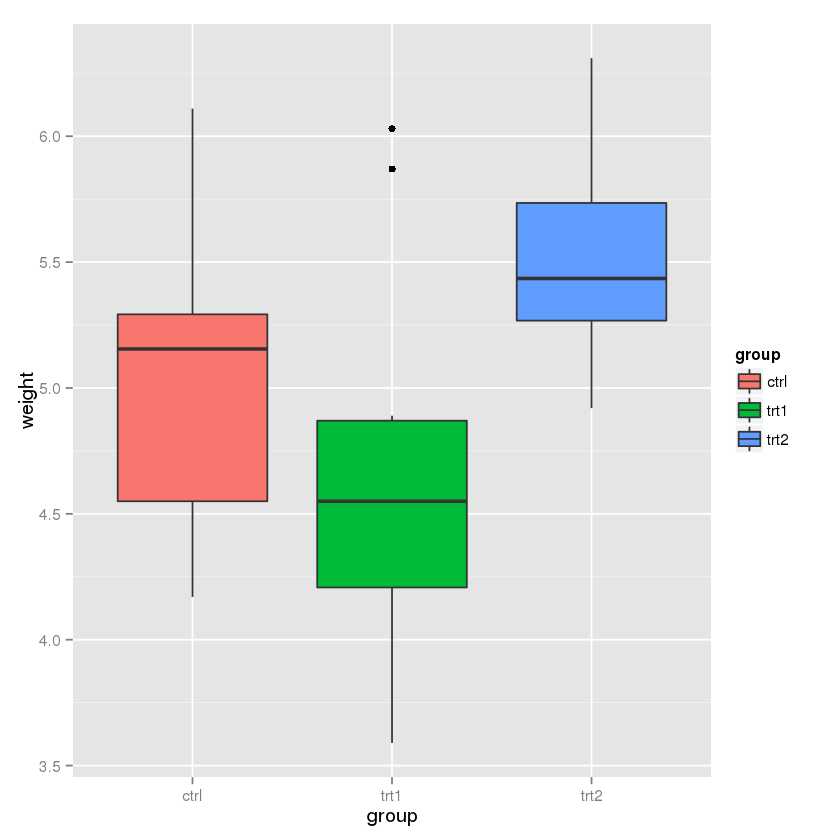

In [1]:
library(ggplot2)
bp <- ggplot(data=PlantGrowth, aes(x=group, y=weight, fill=group)) + geom_boxplot()
bp

### Removing the legend

Use guides(`fill=FALSE`), replacing fill with the desired aesthetic.

You can also remove all the legends in a graph, using `theme`.

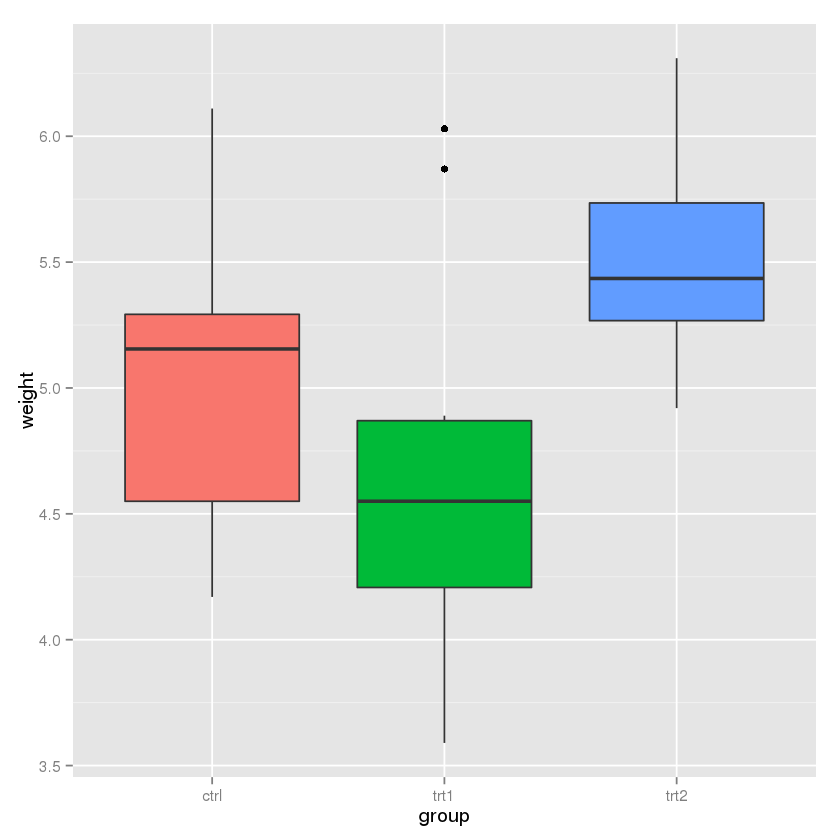

In [2]:
# Remove legend for a particular aesthetic (fill)
bp + guides(fill=FALSE)

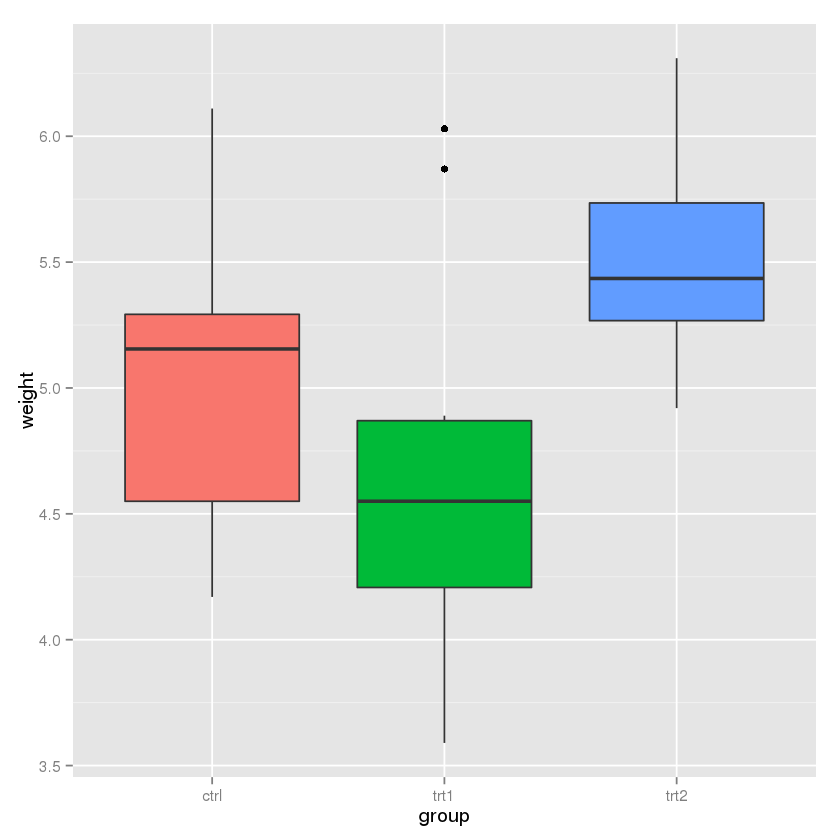

In [3]:
# It can also be done when specifying the scale
bp + scale_fill_discrete(guide=FALSE)

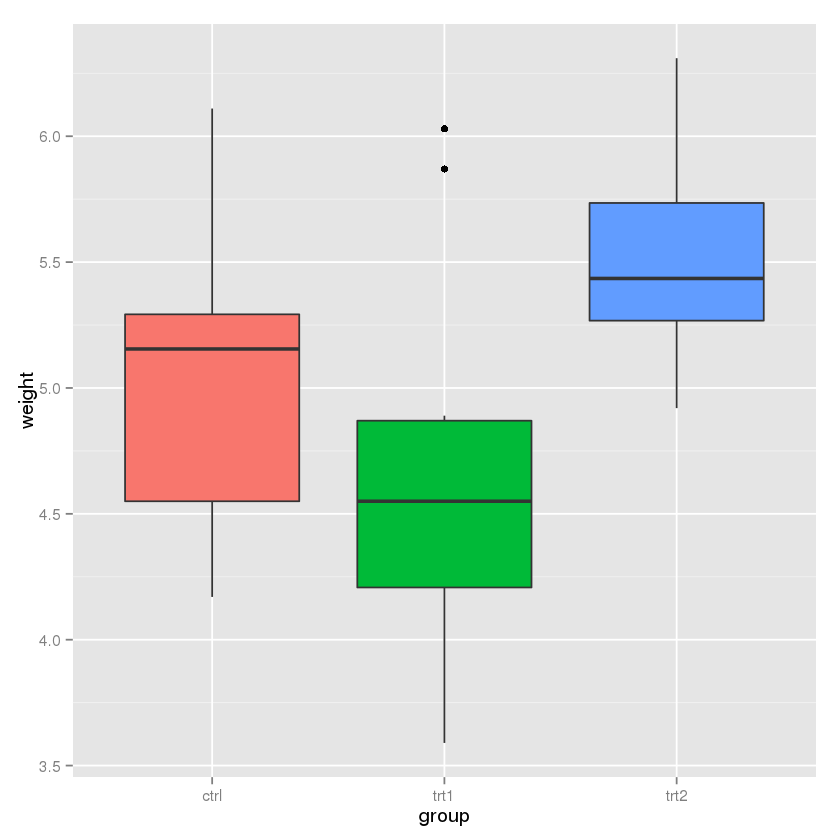

In [4]:
# This removes all legends
bp + theme(legend.position="none")

Depending on how the colors are specified, you may have to use a different scale, such as `scale_fill_manual`, `scale_colour_hue`, `scale_colour_manual`, `scale_shape_discrete`, `scale_linetype_discrete`, and so on.

### Reversing the order of items in the legend

To reverse the legend order:

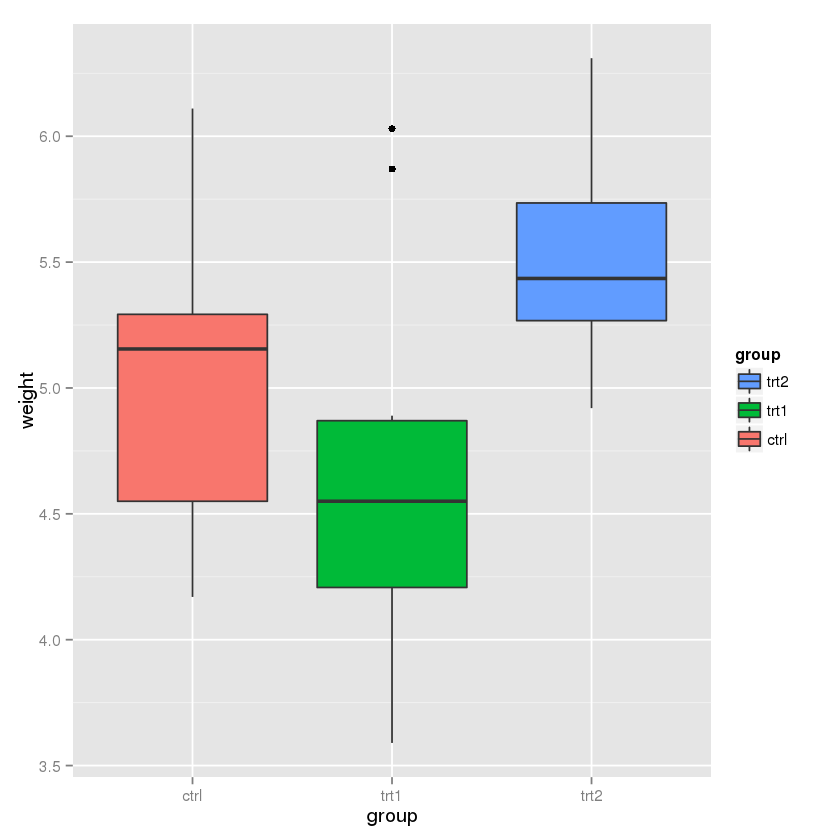

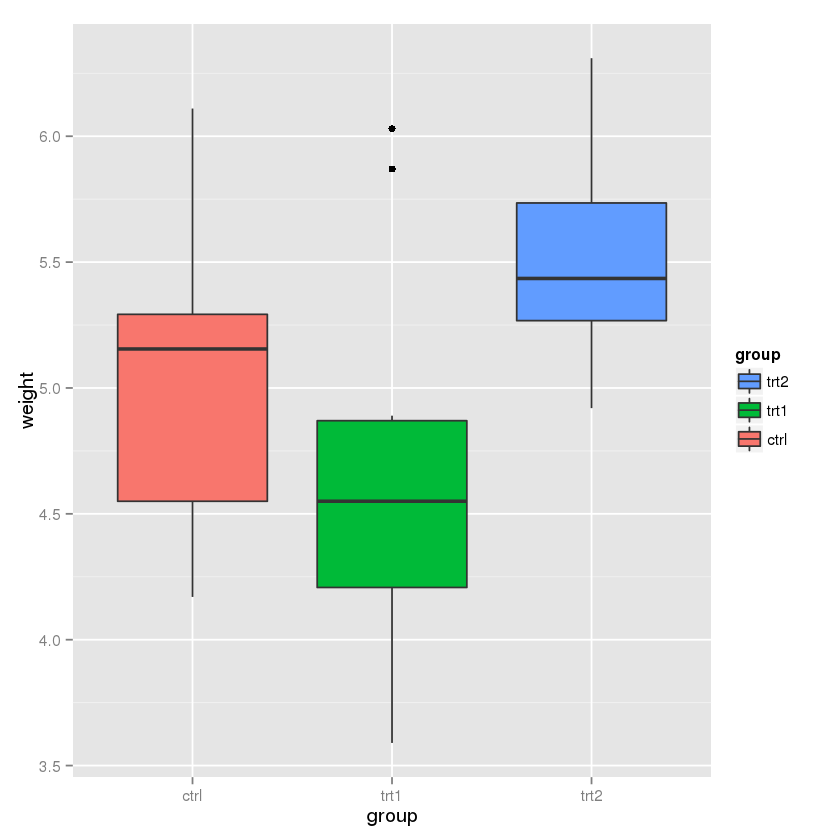

In [5]:
# These two methods are equivalent:
bp + guides(fill = guide_legend(reverse=TRUE))
bp + scale_fill_discrete(guide = guide_legend(reverse=TRUE))

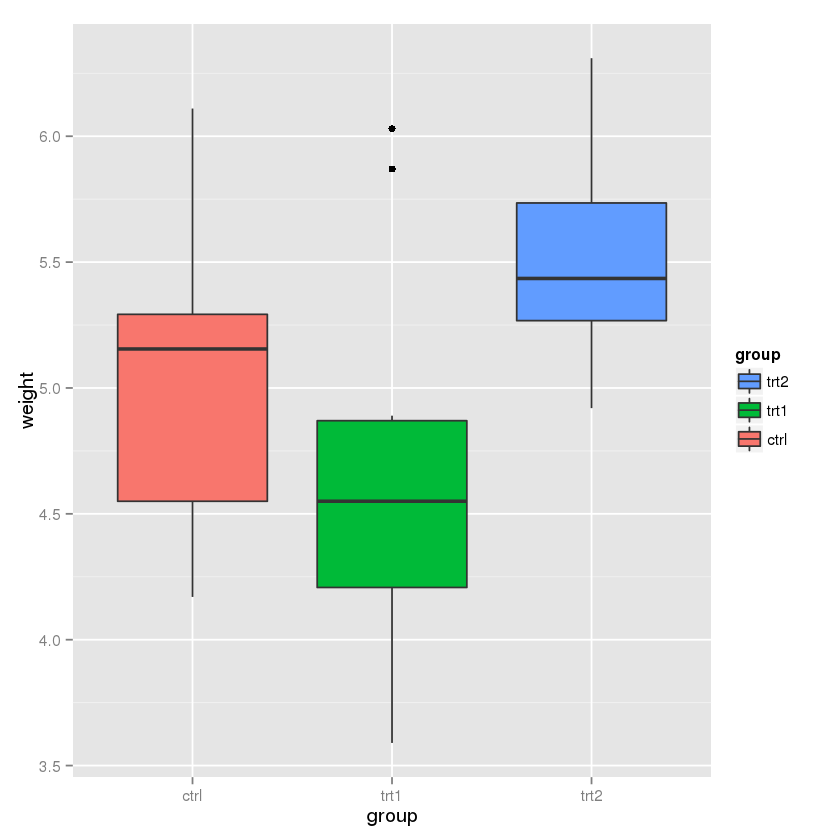

In [6]:
# You can also modify the scale directly:
bp + scale_fill_discrete(breaks = rev(levels(PlantGrowth$group)))

Instead of `scale_fill_discrete`, you may need to use a different scale, such as `scale_fill_manual`, `scale_colour_hue`, `scale_colour_manual`, `scale_shape_discrete`, `scale_linetype_discrete`, and so on.

### Hiding the legend title

This will hide the legend title:

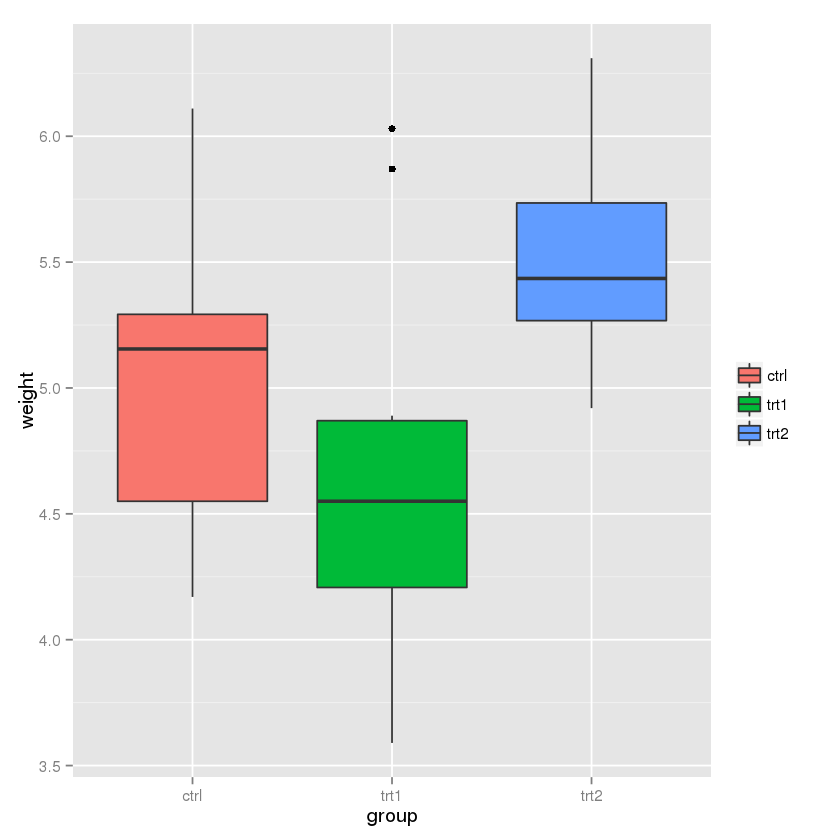

In [7]:
# Remove title for fill legend
bp + guides(fill=guide_legend(title=NULL))

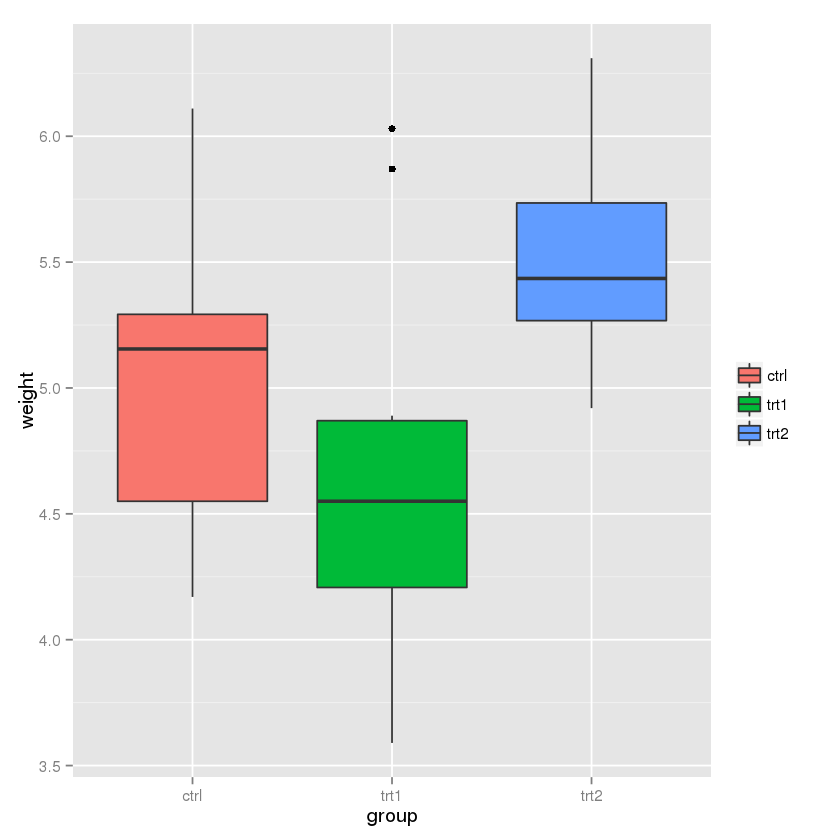

In [8]:
# Remove title for all legends
bp + theme(legend.title=element_blank())

### Modifying the text of legend titles and labels

There are two ways of changing the legend title and labels. The first way is to tell the *scale* to use have a different title and labels. The second way is to change data frame so that the factor has the desired form.

#### Using scales

The legend can be a guide for `fill`, `colour`, `linetype`, `shape`, or other aesthetics.

#### With fill and color

Because group, the variable in the legend, is mapped to the color `fill`, it is necessary to use `scale_fill_xxx`, where `xxx` is a method of mapping each factor level of `group` to different colors. The default is to use a different hue on the color wheel for each factor level, but it is also possible to manually specify the colors for each level.

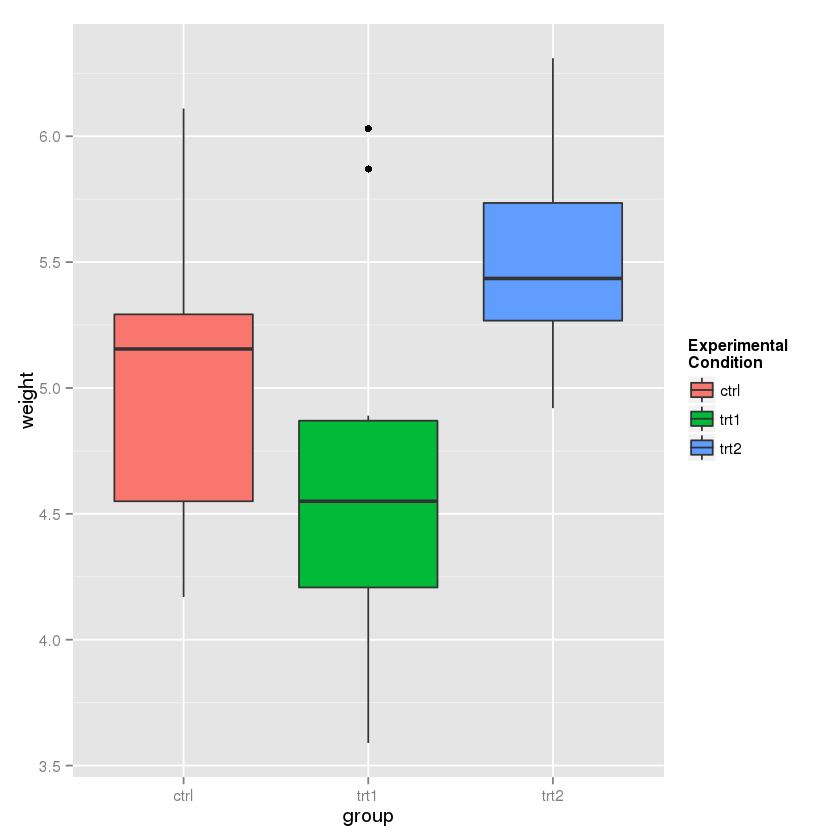

In [9]:
bp + scale_fill_discrete(name="Experimental\nCondition")

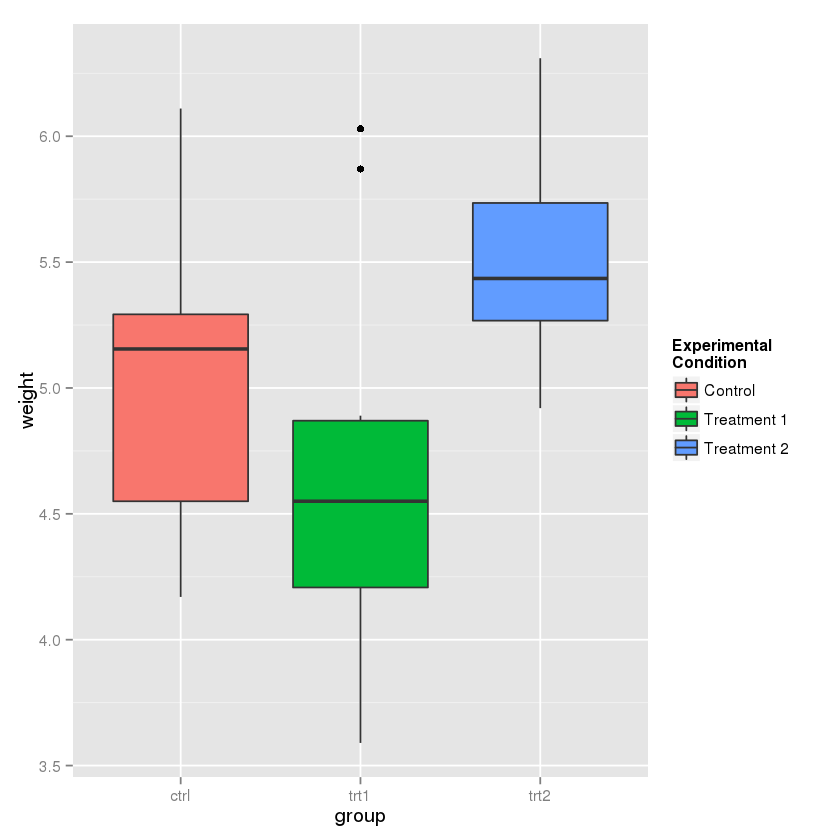

In [10]:
bp + scale_fill_discrete(name="Experimental\nCondition",
                         breaks=c("ctrl", "trt1", "trt2"),
                         labels=c("Control", "Treatment 1", "Treatment 2"))

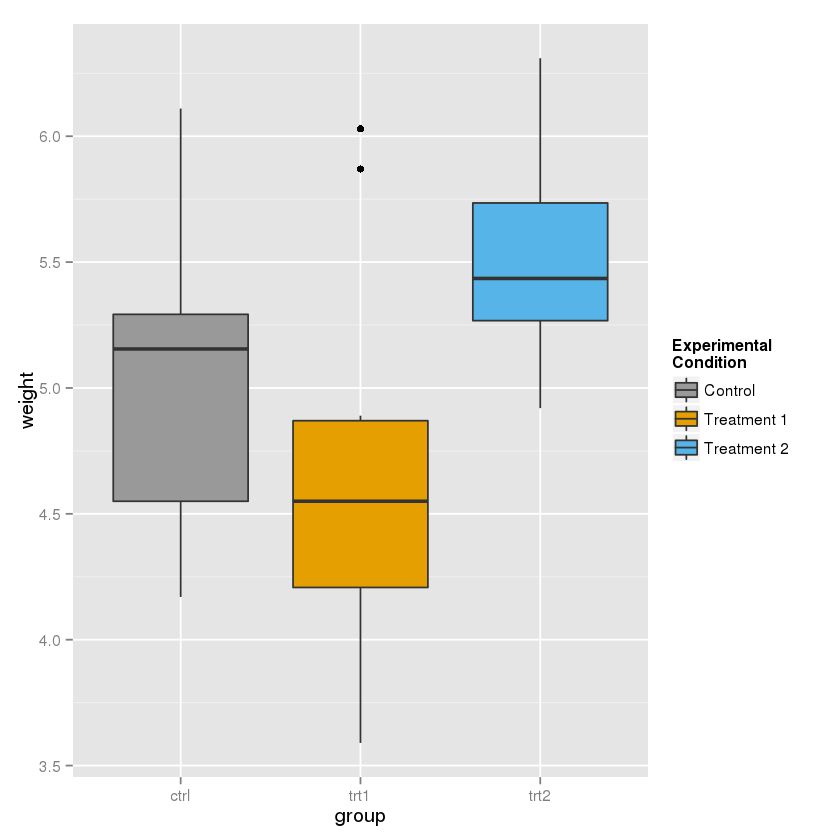

In [11]:
# Using a manual scale instead of hue
bp + scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"), 
                       name="Experimental\nCondition",
                       breaks=c("ctrl", "trt1", "trt2"),
                       labels=c("Control", "Treatment 1", "Treatment 2"))

Note that this didn’t change the x axis labels. Search for "Axes ggplot2" for information on how to modify the axis labels.

If you use a line graph, you will probably need to use `scale_colour_xxx` and/or `scale_shape_xxx` instead of `scale_fill_xxx`. **colour** maps to the colors of lines and points, while **fill** maps to the color of area fills. **shape** maps to the shapes of points.

We’ll use a different data set for the line graphs here because the PlantGrowth data set does not work well with a line graph.

In [12]:
# A different data set
df1 <- data.frame(
    sex = factor(c("Female","Female","Male","Male")),
    time = factor(c("Lunch","Dinner","Lunch","Dinner"), levels=c("Lunch","Dinner")),
    total_bill = c(13.53, 16.81, 16.24, 17.42)
)

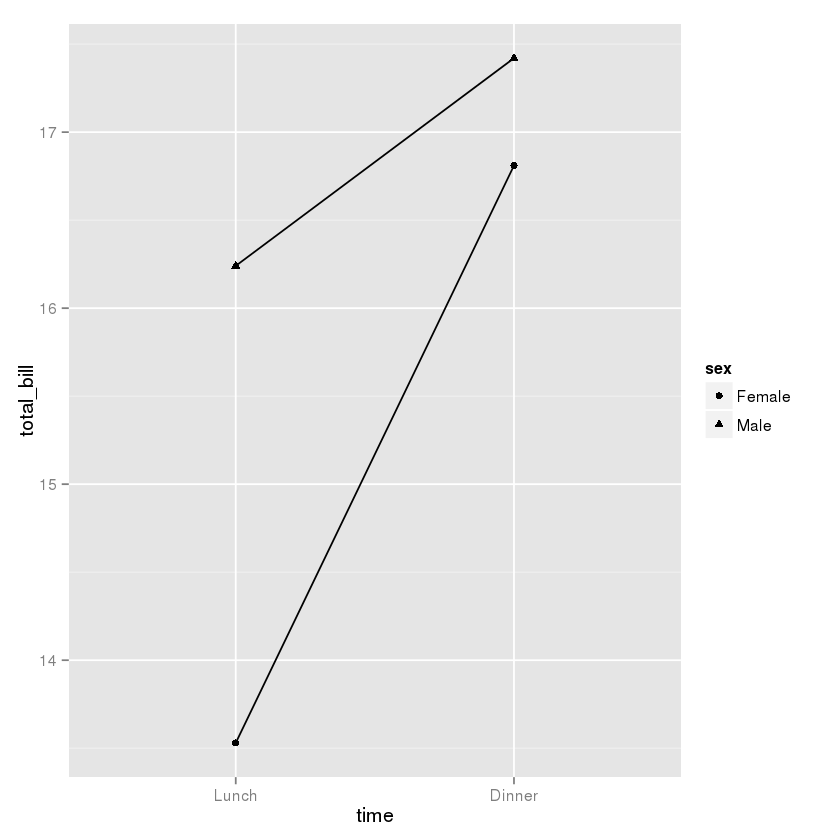

In [13]:
# A basic graph
lp <- ggplot(data=df1, aes(x=time, y=total_bill, group=sex, shape=sex)) + geom_line() + geom_point()
lp

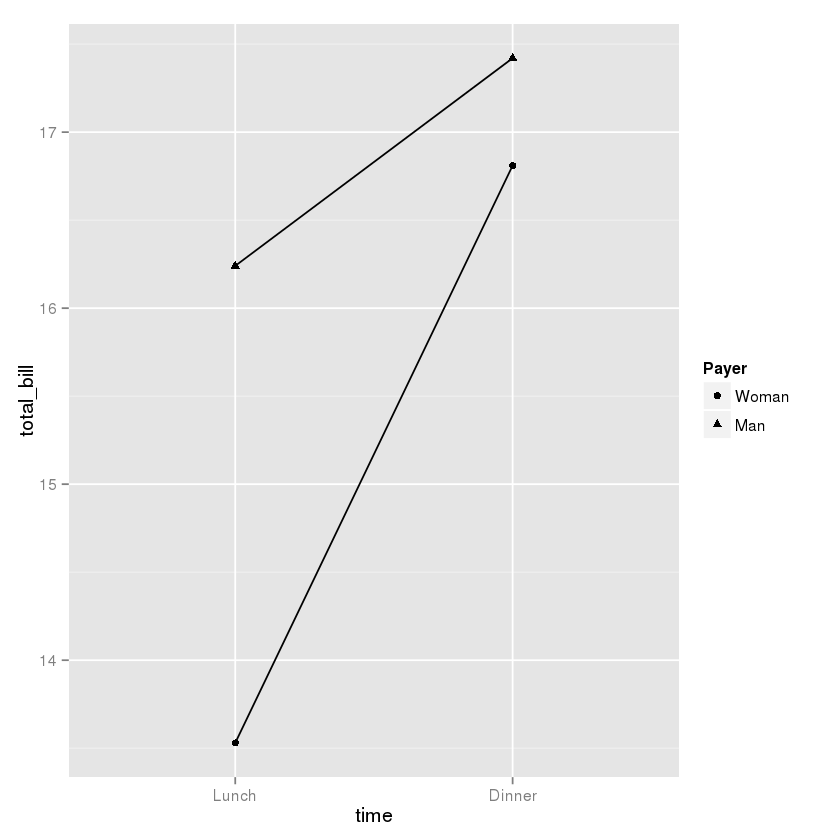

In [14]:
# Change the legend
lp + scale_shape_discrete(name  ="Payer",
                          breaks=c("Female", "Male"),
                          labels=c("Woman", "Man"))

If you use both `colour` and `shape`, they both need to be given scale specifications. Otherwise there will be two two separate legends.

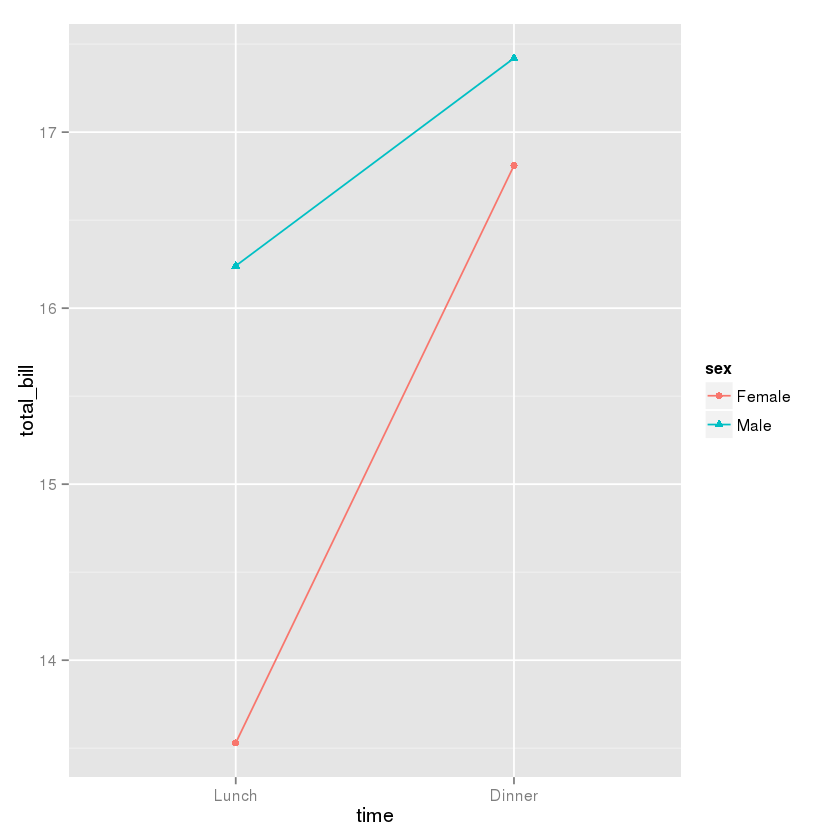

In [15]:
# Specify colour and shape
lp1 <- ggplot(data=df1, aes(x=time, y=total_bill, group=sex, shape=sex, colour=sex)) + geom_line() + geom_point()
lp1

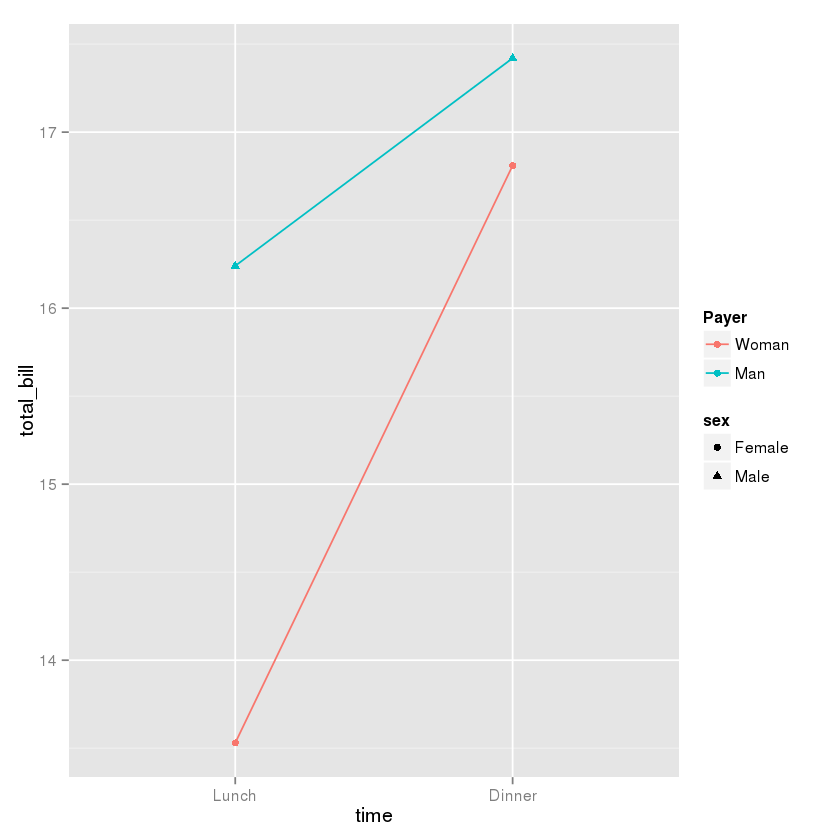

In [16]:
# Here's what happens if you just specify colour
lp1 + scale_colour_discrete(name  ="Payer",
                            breaks=c("Female", "Male"),
                            labels=c("Woman", "Man"))

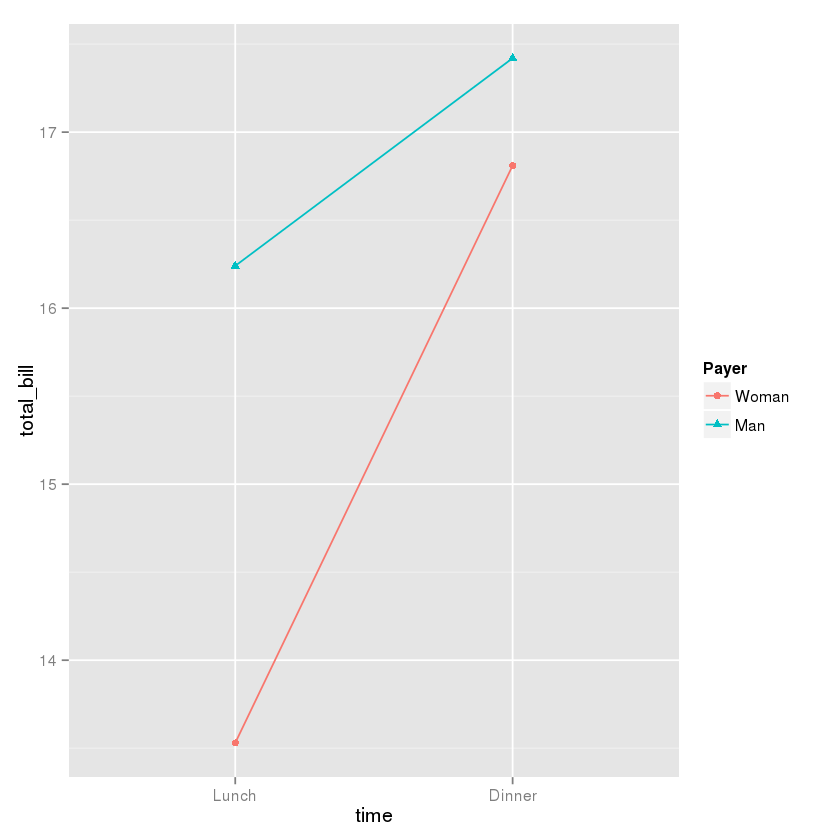

In [17]:
# Specify both colour and shape
lp1 + scale_colour_discrete(name  ="Payer",
                            breaks=c("Female", "Male"),
                            labels=c("Woman", "Man")) +
      scale_shape_discrete(name  ="Payer",
                           breaks=c("Female", "Male"),
                           labels=c("Woman", "Man"))

### Kinds of scales

There are many kinds of scales. They take the form `scale_xxx_yyy`. Here are some commonly-used values of `xxx` and `yyy`:

| xxx | Description |
|-----|-------------|
|colour |Color of lines and points |
|fill | Color of area fills (e.g. bar graph) |
|linetype | Solid/dashed/dotted lines |
|shape | Shape of points |
|size | Size of points |
|alpha | Opacity/transparency |

| yyy | Description |
|-----|-------------|
|hue | Equally-spaced colors from the color wheel |
|manual | Manually-specified values (e.g., colors, point shapes, line types) |
|gradient | Color gradient |
|grey | Shades of grey |
|discrete | Discrete values (e.g., colors, point shapes, line types, point sizes) |
|continuous | Continuous values (e.g., alpha, colors, point sizes) |

### Changing the factor in the data frame

Another way to change the legend title and labels is to directly modify the data frame.

In [18]:
pg <- PlantGrowth    # Copy data into new data frame
# Rename the column and the values in the factor
levels(pg$group)[levels(pg$group)=="ctrl"] <- "Control"
levels(pg$group)[levels(pg$group)=="trt1"] <- "Treatment 1"
levels(pg$group)[levels(pg$group)=="trt2"] <- "Treatment 2"
names(pg)[names(pg)=="group"]  <- "Experimental Condition"

In [19]:
# View a few rows from the end product
head(pg)

,weight,Experimental Condition
1,4.17,Control
2,5.58,Control
3,5.18,Control
4,6.11,Control
5,4.5,Control
6,4.61,Control


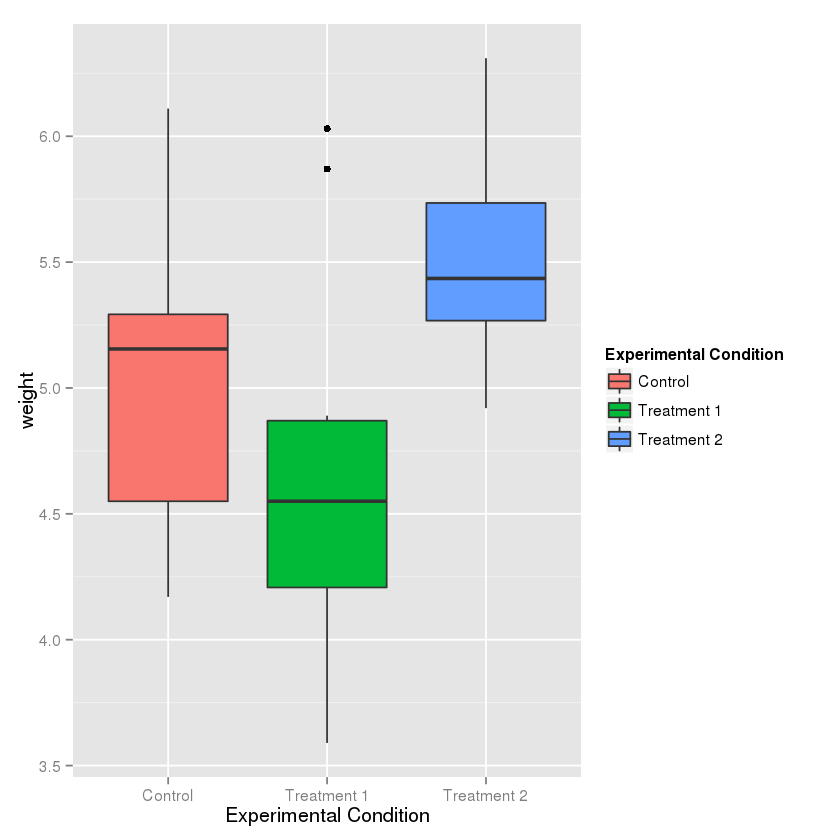

In [20]:
# Make the plot 
ggplot(data=pg, aes(x=`Experimental Condition`, y=weight, fill=`Experimental Condition`)) +
    geom_boxplot()

The legend title “Experimental Condtion” is long and it might look better if it were broken into two lines, but this doesn’t work very well with this method, since you would have to put a newline character in the name of the column. The other method, with scales, is generally a better way to do this.

Also note the use of backticks instead of quotes. They are necessary because of the spaces in the variable name.

### Modifying the appearance of the legend title and labels

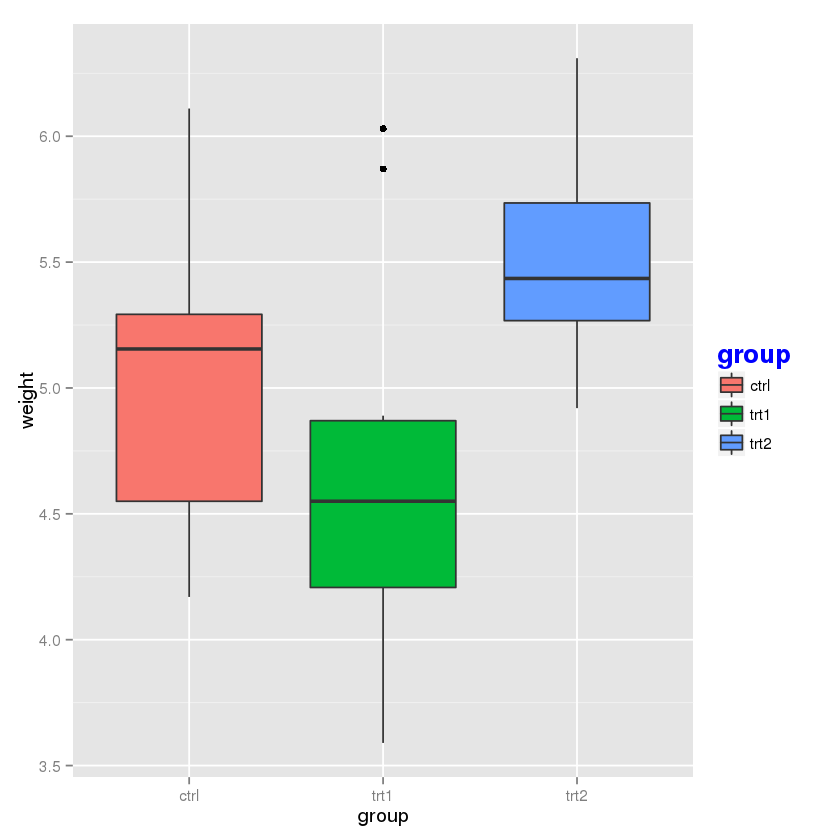

In [21]:
# Title appearance
bp + theme(legend.title = element_text(colour="blue", size=16, face="bold"))

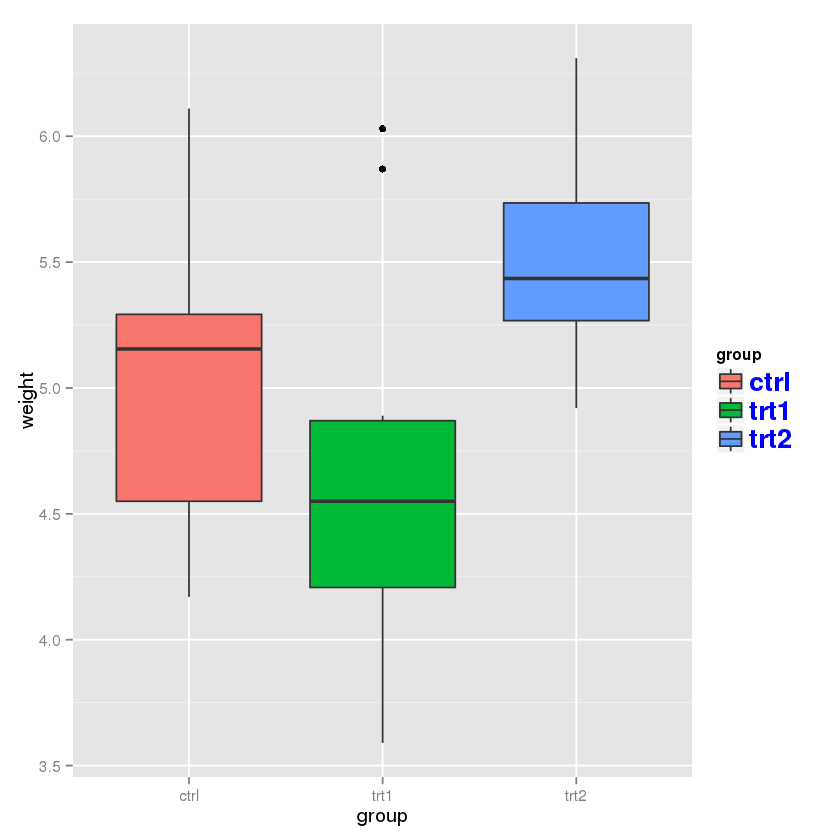

In [22]:
# Label appearance
bp + theme(legend.text = element_text(colour="blue", size = 16, face = "bold"))

### Modifying the legend box

By default, the legend will not have a box around it. To add a box and modify its properties:

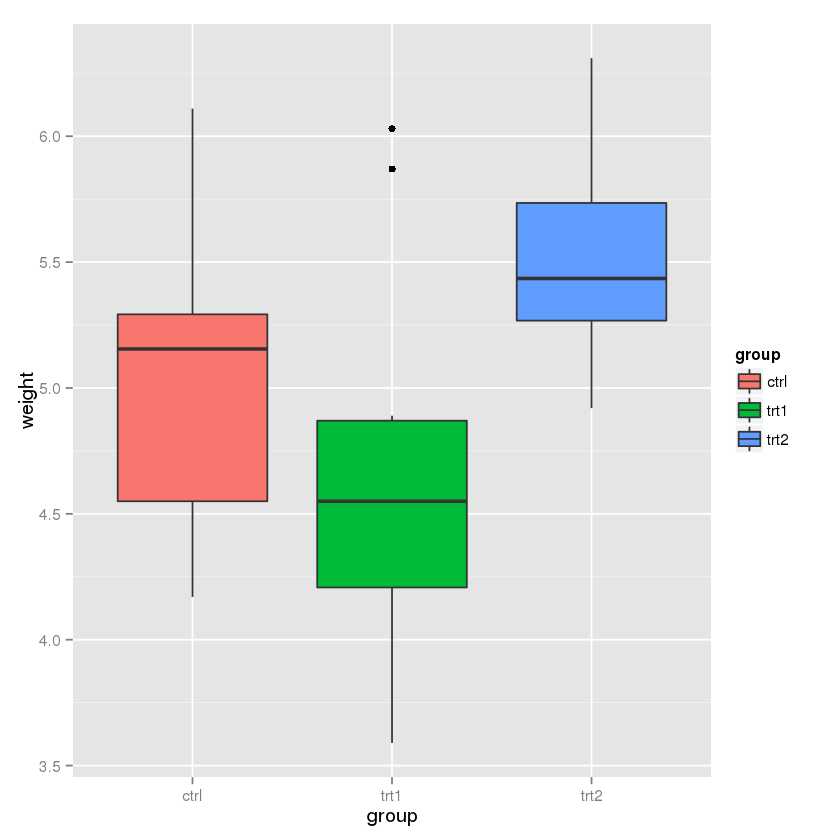

In [23]:
bp + theme(legend.background = element_rect())

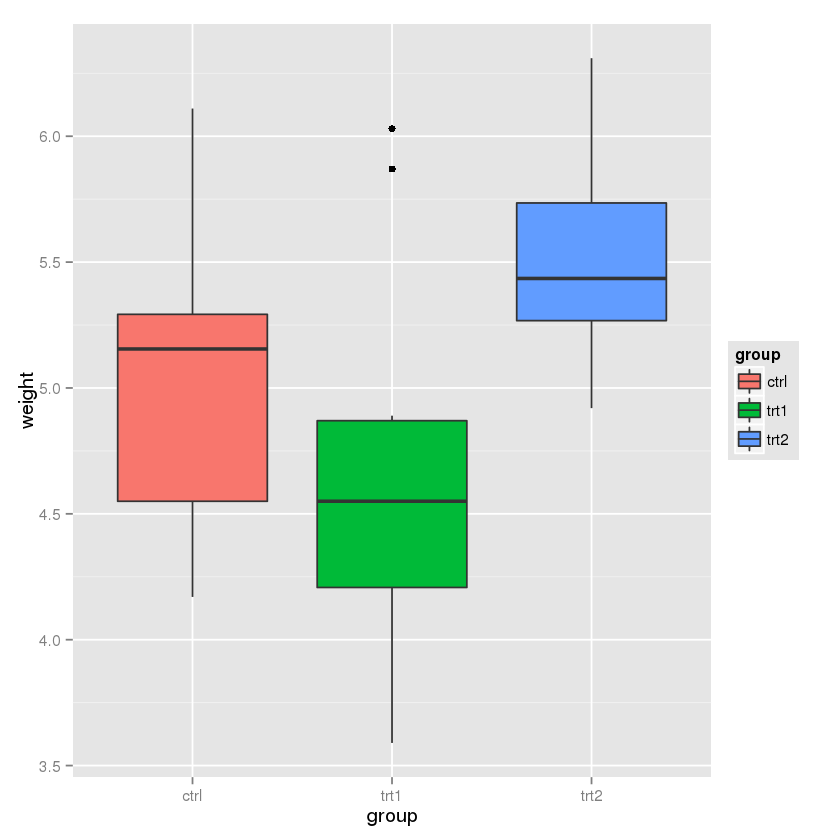

In [24]:
bp + theme(legend.background = element_rect(fill="gray90", size=.5, linetype="dotted"))

### Changing the position of the legend

Position legend outside the plotting area (left/right/top/bottom):

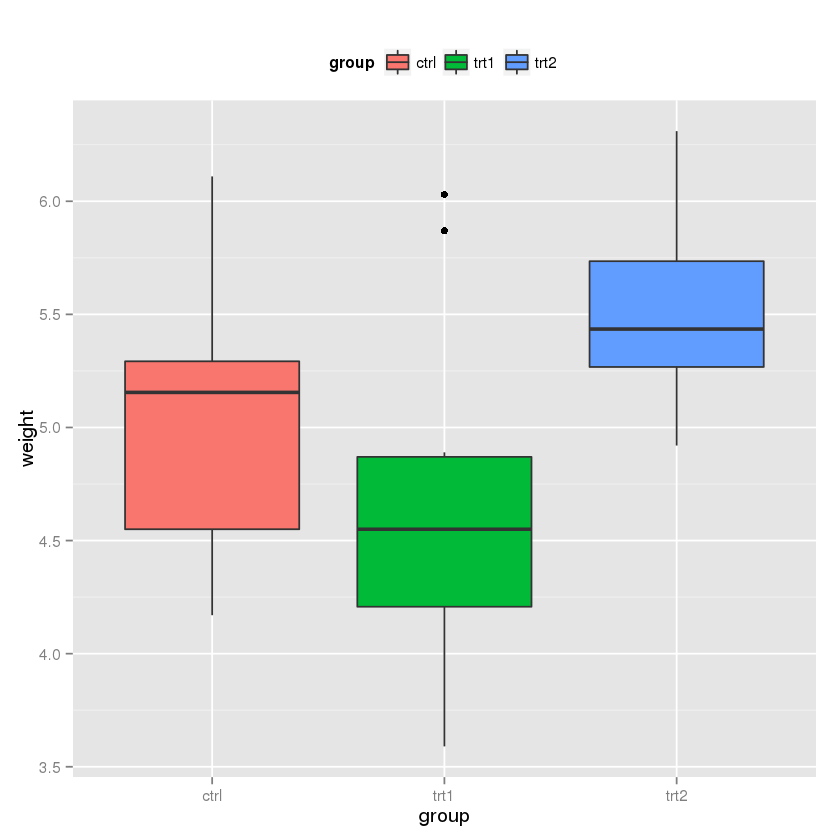

In [25]:
bp + theme(legend.position="top")

It is also possible to position the legend inside the plotting area. Note that the numeric position below is relative to the entire area, including titles and labels, not just the plotting area.

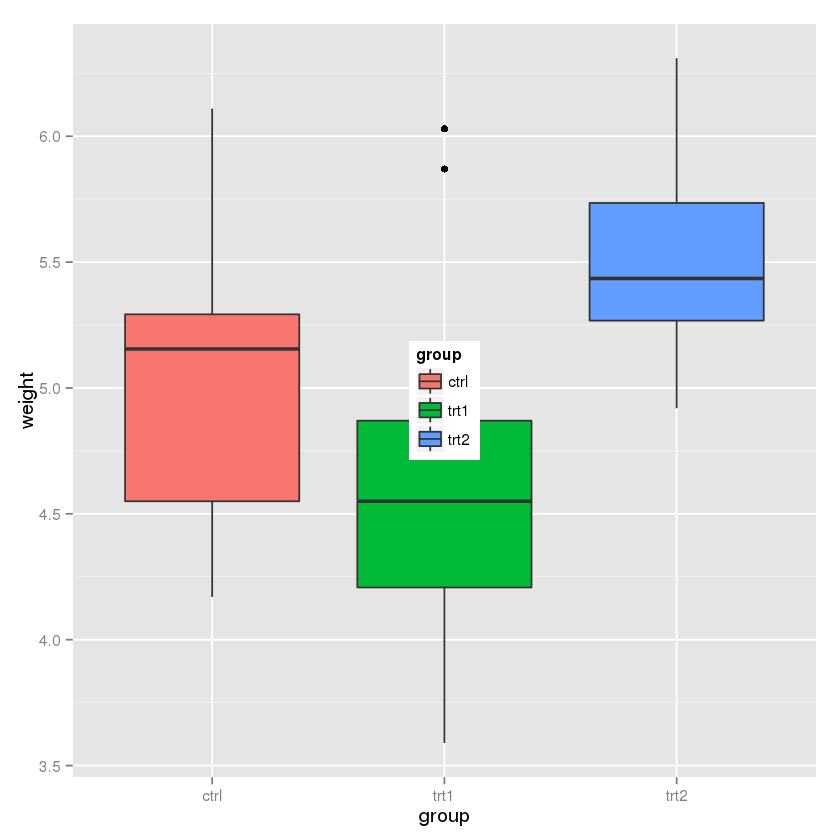

In [26]:
# Position legend in graph, where x,y is 0,0 (bottom left) to 1,1 (top right)
bp + theme(legend.position=c(.5, .5))

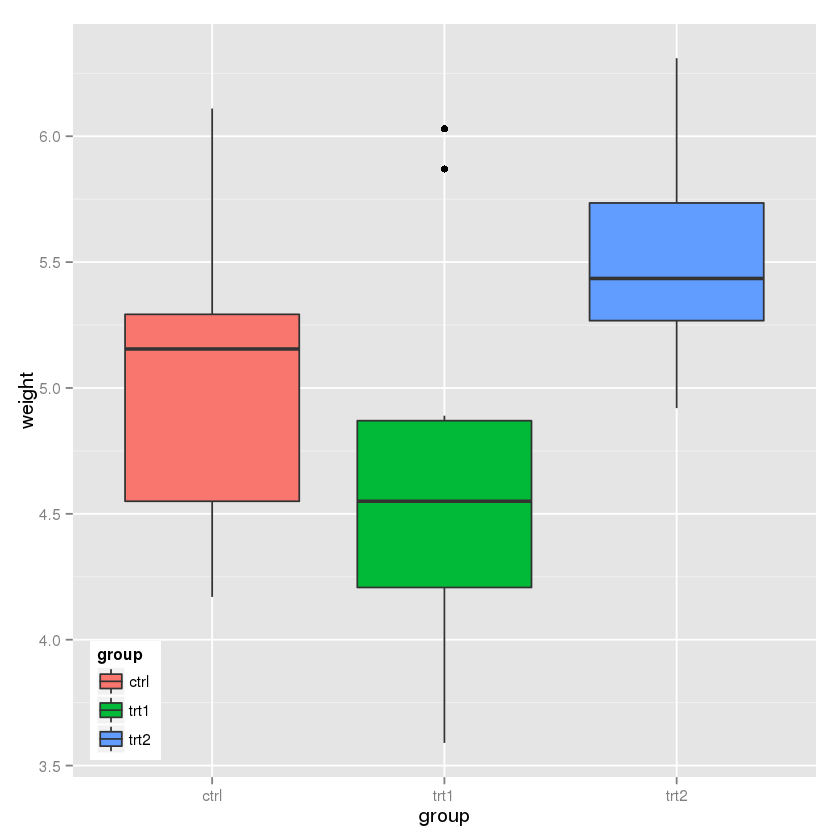

In [27]:
# Set the "anchoring point" of the legend (bottom-left is 0,0; top-right is 1,1)
# Put bottom-left corner of legend box in bottom-left corner of graph
bp + theme(legend.justification=c(0,0), legend.position=c(0,0))

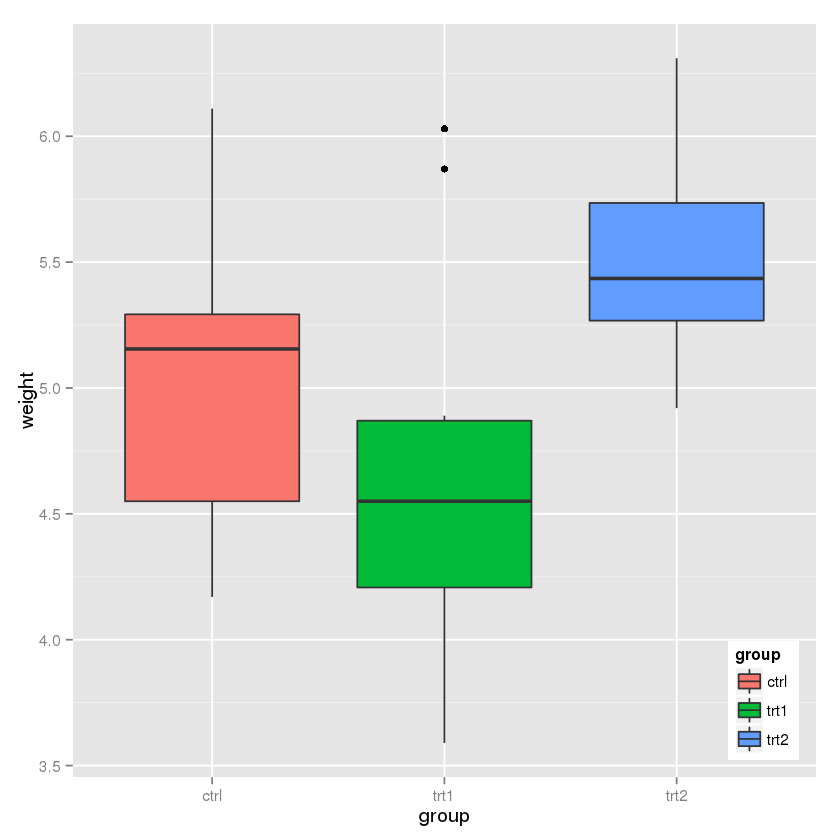

In [28]:
# Put bottom-right corner of legend box in bottom-right corner of graph
bp + theme(legend.justification=c(1,0), legend.position=c(1,0))

### Hiding slashes in the legend

If you make bar graphs with an outline (by setting colour=”black”), it will draw a slash through the colors in the legend. There is not a built-in way to remove the slashes, but it is possible to cover them up.

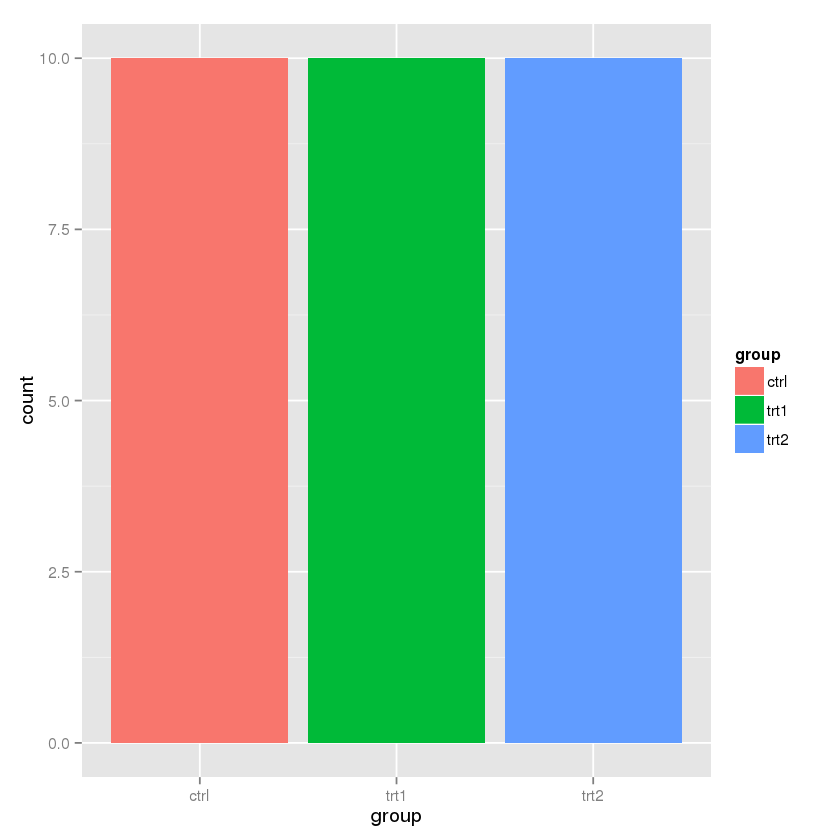

In [29]:
# No outline
ggplot(data=PlantGrowth, aes(x=group, fill=group)) +
    geom_bar()

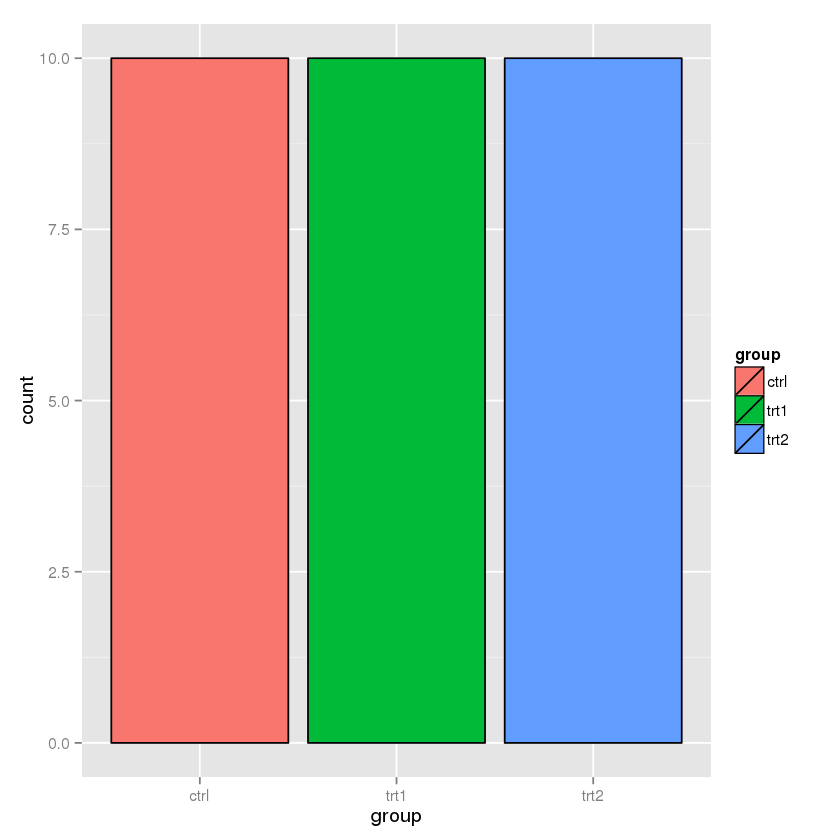

In [30]:
# Add outline, but slashes appear in legend
ggplot(data=PlantGrowth, aes(x=group, fill=group)) +
    geom_bar(colour="black")

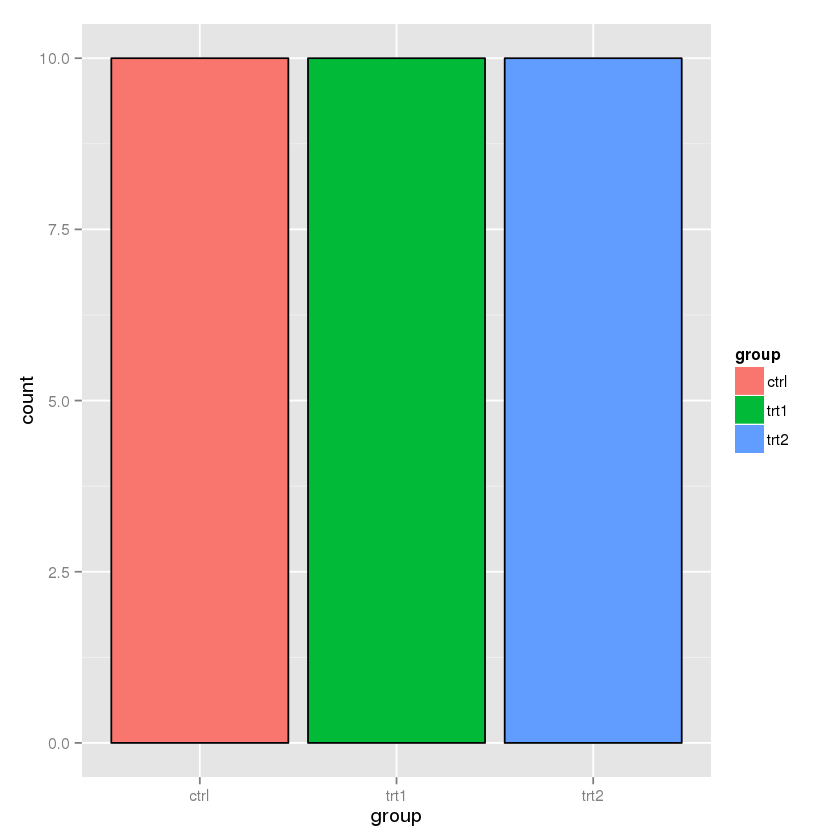

In [31]:
# A hack to hide the slashes: first graph the bars with no outline and add the legend,
# then graph the bars again with outline, but with a blank legend.
ggplot(data=PlantGrowth, aes(x=group, fill=group)) +
    geom_bar() +
    geom_bar(colour="black", show_guide=FALSE)

### Notes

For further information, see:
https://github.com/hadley/ggplot2/wiki/Legend-Attributes